<a href="https://colab.research.google.com/github/monicaneli/Reducao_de_dimensionalidade_em_imagens/blob/main/Reducao_de_dimensionalidade_em_imagens.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Redução de dimensionalidade em imagens

Este projeto apresenta uma implementação em Python para transformação de imagens coloridas em duas representações de menor complexidade: escala de cinza (0–255) e binarizada (0 e 255, preto e branco).

A redução de dimensionalidade é um passo essencial em visão computacional, pois simplifica a representação dos dados sem comprometer informações relevantes para análise, tornando os modelos mais robustos e eficientes.

## Por que converter as cores de uma imagem?

A conversão para tons de cinza e, posteriormente, para imagens binárias permite reduzir significativamente o número de canais de cor, diminuindo o espaço de armazenamento e o custo computacional de processamento.

Essa abordagem é amplamente utilizada em pré-processamento de imagens para tarefas como reconhecimento de padrões, segmentação e classificação, facilitando o treinamento de algoritmos de aprendizado de máquina.

## Objetivo

O objetivo principal é implementar, de forma clara e didática, um fluxo de transformação de imagens utilizando Python e bibliotecas como NumPy, Matplotlib e OpenCV.

O projeto inclui:

* Leitura de imagens coloridas (RGB).
* Conversão para tons de cinza a partir da fórmula ponderada dos canais R, G e B.
* Aplicação de limiar (thresholding) para obtenção de imagens binárias.
* Visualização comparativa das três versões (original, cinza e binária).

## Contribuição

O trabalho demonstra como operações simples de pré-processamento podem reduzir a dimensionalidade de imagens e servir como base para aplicações mais avançadas em visão computacional e aprendizado de máquina.

Além disso, fornece uma implementação prática e modular que pode ser facilmente adaptada a diferentes contextos de análise de imagens.


In [5]:
# Download de imagem
!wget https://github.com/Universidade-Livre/imagens/raw/main/outras/placeholder.png

--2025-09-10 20:24:09--  https://github.com/Universidade-Livre/imagens/raw/main/outras/placeholder.png
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Universidade-Livre/imagens/main/outras/placeholder.png [following]
--2025-09-10 20:24:09--  https://raw.githubusercontent.com/Universidade-Livre/imagens/main/outras/placeholder.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 786479 (768K) [image/png]
Saving to: ‘placeholder.png’

placeholder.png     100%[===================>] 768.05K  --.-KB/s    in 0.08s   

2025-09-10 20:24:09 (9.52 MB/s) - ‘placeholder.png’ saved [786479/786479]



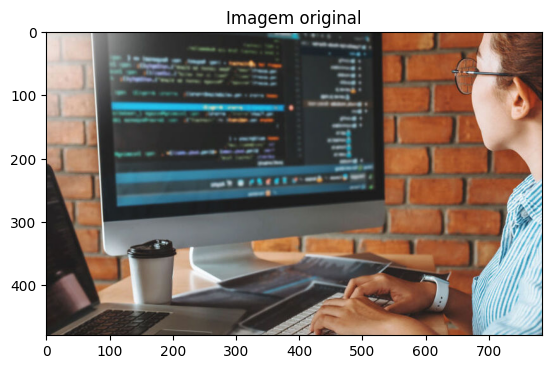

In [35]:
# Imports e parâmetros
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import cv2
from google.colab.patches import cv2_imshow # Fix para import cv2_imshow

# Imagem original
imagem_original_path = "placeholder.png"
imagem_original = plt.imread(imagem_original_path)
plt.title("Imagem original")
plt.imshow(imagem_original)

In [17]:
#Leitura da imagem colorida
imagem = Image.open(imagem_path)

# Converter para array NumPy, cada pixel [R,G,B]
imagem_array = np.array(imagem)
print(f"[Leitura da imagem] dimensões do array: {imagem_array.shape}")

[Leitura da imagem] dimensões do array: (480, 785, 3)


[Conversão para escala de cinza] dimensões do array: (480, 785)


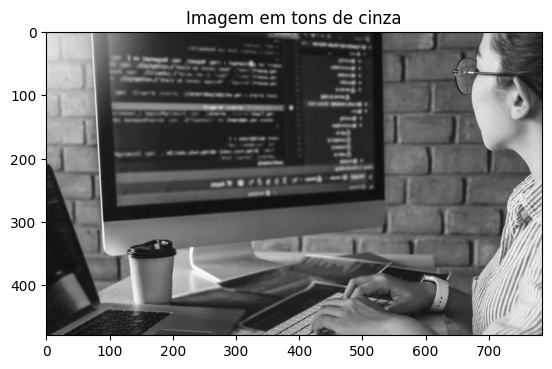

In [26]:
#Conversão para escala de cinza (0 a 255)

def converter_rgb_para_cinza(pixel):
  #Valor em Cinza = 0.299R + 0.587G + 0.114B
  gray_pixel = int(0.299 * pixel[0] + 0.587 * pixel[1] + 0.114 * pixel[2])
  return max(0, min(255, gray_pixel))

imagem_cinza_array = np.array([[converter_rgb_para_cinza(pixel) for pixel in linha] for linha in imagem_array], dtype=np.uint8)
print(f"[Conversão para escala de cinza] dimensões do array: {imagem_cinza_array.shape}")

# Converter para imagem
imagem_cinza = Image.fromarray(imagem_cinza_array)
imagem_cinza.save("imagem_cinza.png")

plt.imshow(imagem_cinza, cmap='gray')
plt.title("Imagem em tons de cinza")
plt.show()

[Binarização] dimensões do array: (480, 785)


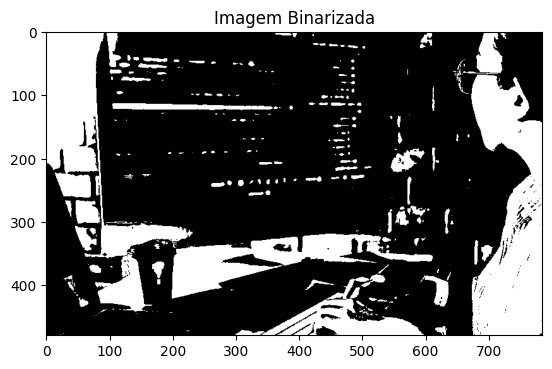

In [29]:
# Conversão para imagem binarizada (0 preto e 255 branco), preto e branco

#Aplicação de limiar para binarização
limiar = int(255/2)

# Conversão: 0 para valores abaixo (false) e 255 para valores acima (True)
imagem_binaria_array = (imagem_cinza_array > limiar) * 255
imagem_binaria_array = imagem_binaria_array.astype(np.uint8) #garante compatibilidade
print(f"[Binarização] dimensões do array: {imagem_binaria_array.shape}")

# Conversão para imagem
imagem_binaria = Image.fromarray(imagem_binaria_array)
imagem_binaria.save("imagem_binaria.png")
plt.imshow(imagem_binaria, cmap='gray')
plt.title("Imagem Binarizada")
plt.show()

Resultados da implementação das transformações


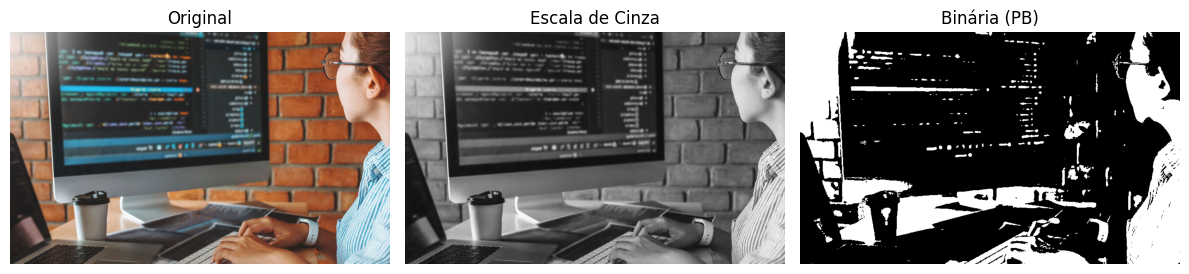

In [38]:
# Resultados da implementação manual
print("Resultados da implementação das transformações")
plt.figure(figsize=(12, 4))

# 1. Imagem original
plt.subplot(1, 3, 1)  # (linhas, colunas, índice)
plt.title("Original")
plt.imshow(imagem_original)
plt.axis("off")

# 2. Imagem em tons de cinza
plt.subplot(1, 3, 2)
plt.title("Escala de Cinza")
plt.imshow(imagem_cinza, cmap="gray")
plt.axis("off")

# 3. Imagem binária
plt.subplot(1, 3, 3)
plt.title("Binária (PB)")
plt.imshow(imagem_binaria, cmap="gray")
plt.axis("off")

plt.tight_layout()
plt.show()


Transformações utilizando OpenCV


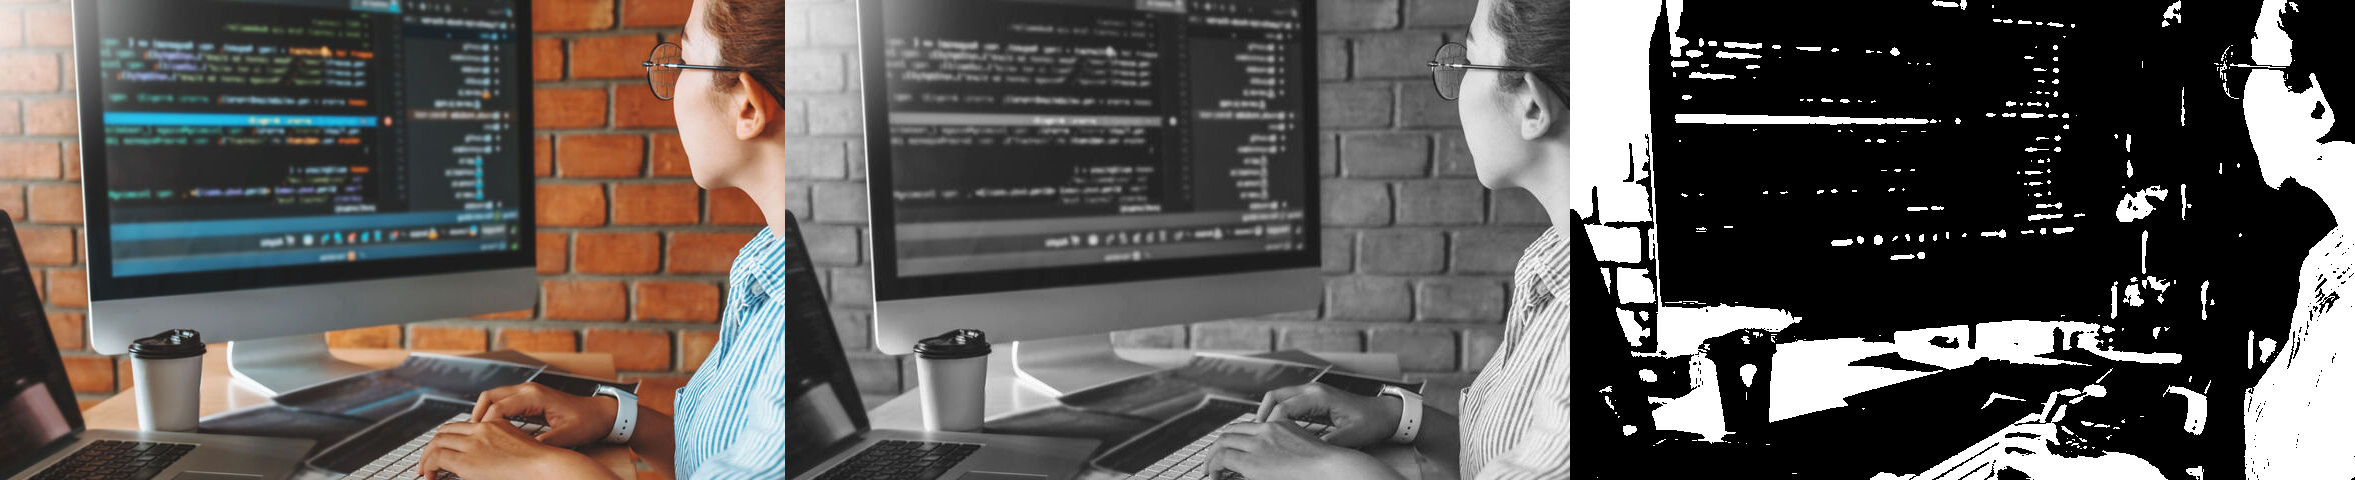

In [37]:
# As mesmas transformações porém utilizando funções prontas do framework OpenCV
img = cv2.imread(imagem_original_path)

# Converter para tons de cinza
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Converter para binária (thresholding)
_, binary = cv2.threshold(gray, 128, 255, cv2.THRESH_BINARY)

# Preparar imagens para concatenar: o cv2.hconcat precisa que todas tenham 3 canais (BGR)
gray_bgr = cv2.cvtColor(gray, cv2.COLOR_GRAY2BGR)
binary_bgr = cv2.cvtColor(binary, cv2.COLOR_GRAY2BGR)

# Concatenar horizontalmente
final = cv2.hconcat([img, gray_bgr, binary_bgr])

# Visualização
print("Transformações utilizando OpenCV")
cv2_imshow(final)
cv2.waitKey(0)
cv2.destroyAllWindows()